read shp file and convert to geojson

In [16]:
import geopandas as gpd


def convert_shapefile_to_geojson(shapefile_path: str, geojson_output_path: str) -> None:
    """
    Convert a shapefile to GeoJSON format and save it to a file.

    :param shapefile_path: Path to the input shapefile.
    :param geojson_output_path: Path to save the output GeoJSON file.
    """
    # Read the shapefile
    gdf = gpd.read_file(shapefile_path)

    # Convert to GeoJSON
    geojson_output = gdf.to_json()

    # Save the GeoJSON to a file
    with open(geojson_output_path, 'w') as f:
        f.write(geojson_output)
    
    return gdf


# Example usage
# shapefile_path = './CTAmap/2024年初/县级/T2024年初县级.shp'
# geojson_output_path = './CTAmap/2024年初/县级/T2024年初县级.geojson'
shapefile_path = './CTAmap/2024年初/地级/T2024年初地级.shp'
geojson_output_path = './CTAmap/2024年初/地级/T2024年初地级.geojson'
gdf = convert_shapefile_to_geojson(shapefile_path, geojson_output_path)


In [17]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   地名         372 non-null    object  
 1   区划码        372 non-null    object  
 2   地级         372 non-null    object  
 3   地级码        372 non-null    object  
 4   地级类        372 non-null    object  
 5   省级         372 non-null    object  
 6   省级码        372 non-null    object  
 7   省级类        372 non-null    object  
 8   曾用名        13 non-null     object  
 9   备注         20 non-null     object  
 10  ENG_NAME   372 non-null    object  
 11  code       372 non-null    object  
 12  VAR_NAME   372 non-null    object  
 13  NAME_2     372 non-null    object  
 14  VAR_NAME2  372 non-null    object  
 15  GID_2      372 non-null    object  
 16  TYPE_2     372 non-null    object  
 17  NAME_1     372 non-null    object  
 18  VAR_NAME1  372 non-null    object  
 19  GID_1      372 non-nu

In [18]:
gdf.head()

,地名,区划码,地级,地级码,地级类,省级,省级码,省级类,曾用名,备注,...,NAME_2,VAR_NAME2,GID_2,TYPE_2,NAME_1,VAR_NAME1,GID_1,TYPE_1,year,geometry
0,阿克苏地区,652900,阿克苏地区,652900,地区,新疆维吾尔自治区,650000,自治区,None,None,...,Akesu,ā Kè Sū,652900,Prefecture,Xinjiang,Xīn Jiāng,650000,Autonomous Region,2024,"POLYGON ((83.41169 39.48265, 83.35937 39.48294..."
1,阿拉尔市,659002,不统计,0,不统计,新疆维吾尔自治区,650000,自治区,None,None,...,NULL,NULL,0,NULL,Xinjiang,Xīn Jiāng,650000,Autonomous Region,2024,"POLYGON ((81.80661 40.80595, 81.80316 40.80076..."
2,阿拉善盟,152900,阿拉善盟,152900,盟,内蒙古自治区,150000,自治区,None,None,...,Alashan,ā Lā Shàn,152900,League,Neimenggu,Nèi Měng Gǔ,150000,Autonomous Region,2024,"POLYGON ((99 42.60309, 99.50532 42.56749, 99.9..."
3,阿勒泰地区,654300,阿勒泰地区,654300,地区,新疆维吾尔自治区,650000,自治区,None,None,...,Aletai,ā Lè Tài,654300,Prefecture,Xinjiang,Xīn Jiāng,650000,Autonomous Region,2024,"POLYGON ((90.67027 45.48714, 90.66637 45.48529..."
4,阿里地区,542500,阿里地区,542500,地区,西藏自治区,540000,自治区,None,None,...,Ali,ā Lǐ,542500,Prefecture,Xizang,Xī Zàng,540000,Autonomous Region,2024,"POLYGON ((86.19145 31.00676, 86.1888 31.00496,..."


In [19]:
gdf_output = gdf.copy().to_crs(epsg=4326)
gdf_output = gdf_output[['地名', 'ENG_NAME','省级','geometry', 'code']]
gdf_output.to_file('./CTAmap/2024年初/地级/T2024年初地级_short.geojson', driver='GeoJSON')

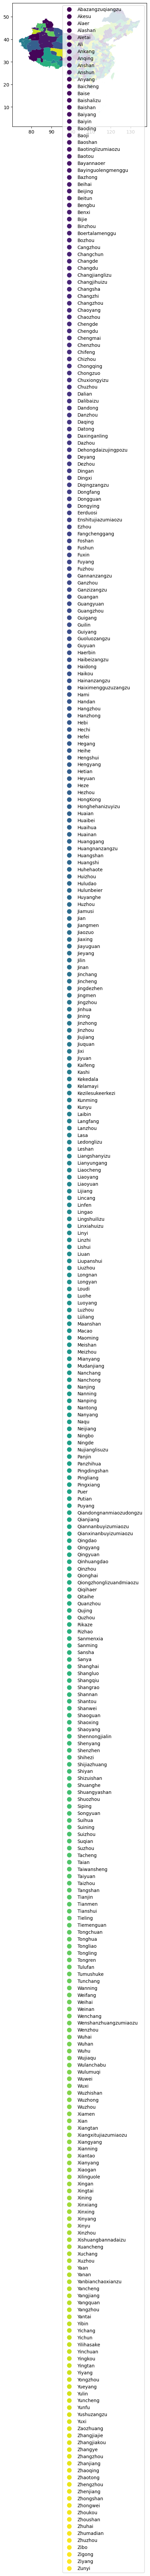

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON data
gdf = gpd.read_file('./CTAmap/2024年初/地级/T2024年初地级_short.geojson')

# Plot the GeoJSON data
gdf.plot(column='ENG_NAME', cmap='viridis', legend=True)

# Show the plot
plt.show()


In [25]:
import json
from shapely.geometry import shape, mapping

def simplify_geojson(geojson_data, tolerance=0.001):
    """
    Simplify GeoJSON data by reducing the complexity of geometries.
    
    :param geojson_data: Original GeoJSON data as a dictionary
    :param tolerance: Simplification tolerance
    :return: Simplified GeoJSON data as a dictionary
    """
    if 'features' in geojson_data:
        for feature in geojson_data['features']:
            if 'geometry' in feature:
                geom = shape(feature['geometry'])
                # 使用几何对象自带的simplify方法
                simplified_geom = geom.simplify(tolerance)
                feature['geometry'] = mapping(simplified_geom)
    return geojson_data

with open('./CTAmap/2024年初/地级/T2024年初地级_short.geojson', 'r') as f:
    geojson_data = json.load(f)

simplified_geojson = simplify_geojson(geojson_data, tolerance=0.01)

with open('./CTAmap/2024年初/地级/T2024年初地级_short_simplified.geojson', 'w') as f:
    json.dump(simplified_geojson, f)


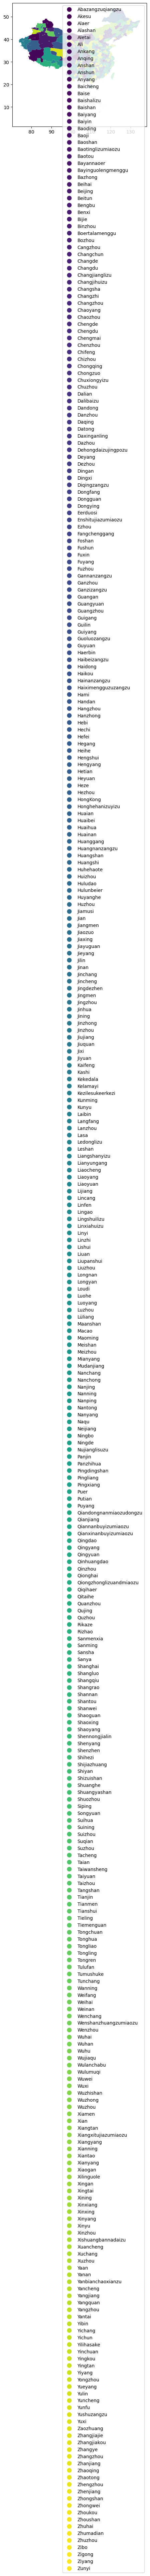

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON data
gdf = gpd.read_file('./CTAmap/2024年初/地级/T2024年初地级_short_simplified.geojson')

# Plot the GeoJSON data
gdf.plot(column='ENG_NAME', cmap='viridis', legend=True)

# Show the plot
plt.show()
